### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## problem with instability in cal12 - run 1AA5 (test run, investigating TOM12_TJ_xxA3 series)

model code: opa_DEV:/gpfs/home/mep22dku/scratch/modelTest/CAL12_v3/CONFIG/ORCA2_LIM_PlankTOM/BLD/bin/nemo.exe

- run 1AA3 completes, but the co2 flux goes completely haywire (up) in 2078 and then does something asymptotic. This is true of the full series of 6 runs - all have the same problem in the same year. it was not true of the previous set of runs

In [6]:

plt.rc('font', **font)

mod = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


Text(0.5, 1.01, 'total Cflx, Pg/yr')

<Figure size 432x288 with 0 Axes>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


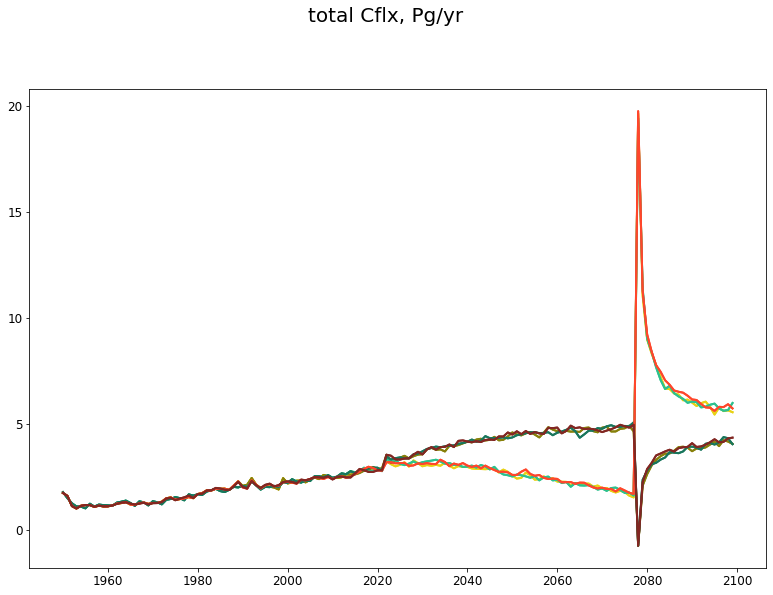

In [7]:
plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

# for i in range(0,6):#len(models)):
    
#     tmod = xr.open_dataset(f'./extracted-summary/Cflx_ukesm{models[i]}.nc')
#     plt.plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'])
    
fact = 1.1
fig, axs = plt.subplots(1,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')


for i in range(0,6):#len(models)):

    tmod = xr.open_dataset(f'./extracted-summary/Cflx_tom_{models[i]}A3.nc')
    axs.plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = '-', linewidth = 2)
    axs.plot(tmod.year,tmod.Cflx, color = mod[models[i]]['color'], linestyle = '-', linewidth = 2)
    
# tits = ['UKESM', 'TOM12- DWmodel', 'CAL12', 'all models']
# for i in range(0,4):
#     axs[i].grid(linestyle = ':', color = 'grey')
#     axs[i].set_xlim([1950,2100])
#     axs[i].set_ylim([0,6])
#     axs[i].set_title(tits[i])
    
plt.suptitle('total Cflx, Pg/yr', y = 1.01, fontsize = 20)

## is it an atmospheric problem (1AA5):

    atmco2.dat points to atmco2.dat.variable points to meinshausen-based file:

    lrwxrwxrwx 1 mep22dku greenocean  71 Oct  5 15:52 atmco2.dat.variable -> /gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp1-26.dat*
    lrwxrwxrwx 1 mep22dku greenocean 105 Oct  5 15:52 atmco2.dat.static -> /gpfs/data/greenocean/software/resources/ModelResources/AtmosCO2/atmco2_dw_edit_4200_v3_CONSTANT_1750.dat
    lrwxrwxrwx 1 mep22dku greenocean  89 Oct  5 15:52 atmco2cfc.dat -> /gpfs/data/greenocean/software/resources/ModelResources/AtmosCO2/atmco2cfc_NEEDS_WORK.dat
    lrwxrwxrwx 1 mep22dku greenocean  19 Oct  5 15:52 atmco2.dat -> atmco2.dat.variable*

    atmco2cfc is a bizarre file but i don't think that's the problem

    something with cfcs, from ocean.output:

    corrections      1.825     2.666     0.005     2.882     2.934     0.212     4.438
      minfer =   1.0000000000000001E-015
      Reading real atmospheric CO2 option
      Reading atmospheric CFC
      atm CFC11    21000101   0.0000000000000000        0.0000000000000000        0.0000000000000000
     Caution: The date is outside tabulated values.
     zyr, zyr(min) zyr(max) =    2100.0013698630137        1650.0419999999999        2077.5000000000000

     ./NEMO/TOP_SRC/PlankTOM/bgcatm.F90:        write(numout,*)'Caution: The date is outside tabulated values.'
     
     !
      IF (zyr .lt. yrco2(1) .OR. zyr .gt. yrco2(nmaxrec)) THEN
        write(numout,*)'Caution: The date is outside tabulated values.'
        write(numout,*)'zyr, zyr(min) zyr(max) = ', zyr, yrco2(1),yrco2(nmaxrec)

In [ ]:

fact = 1.1
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    print(tmod)
    trunid = mod[tmod]['runid']
    
    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{trunid}/breakdown.sur.annual.dat', sep='\t')
    tcol = mod[tmod]['color']
    tlin = '-'#mod[tmod]['linestyle']
    tdesc = mod[tmod]['runid']

    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{trunid}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    filt = (year>1700)
    axs.plot(year[filt],Cflx_total[filt], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')

    axs.legend(ncol = 4, loc = 'best', fontsize = 12)
    axs.set_ylabel('global cflx Pg/y')
    axs.grid(linestyle = ':')

In [ ]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]